In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import geopandas as gpd

In [2]:
dfoy=pd.read_csv('2018Mv_Oy.csv', encoding='utf-8')

cumhur=dfoy['AK PARTİ']+dfoy['MHP']
millet=dfoy['CHP']+dfoy['İYİ PARTİ']+dfoy['SAADET PARTİSİ']

dfoy['AKP']=round(dfoy['AK PARTİ']+(dfoy['AK PARTİ']/cumhur)*dfoy['CUMHUR İTTİFAKI'])
dfoy['MHP']=round(dfoy['MHP']+(dfoy['MHP']/cumhur)*dfoy['CUMHUR İTTİFAKI'])
dfoy['CHP']=round(dfoy['CHP']+(dfoy['CHP']/millet)*dfoy['MİLLET İTTİFAKI'])
dfoy['İYİ']=round(dfoy['İYİ PARTİ']+(dfoy['İYİ PARTİ']/millet)*dfoy['MİLLET İTTİFAKI'])
dfoy['SAADET']=round(dfoy['SAADET PARTİSİ']+(dfoy['SAADET PARTİSİ']/millet)*dfoy['MİLLET İTTİFAKI'])

dfoy.drop(['Unnamed: 0','AK PARTİ', 'İYİ PARTİ', 'SAADET PARTİSİ', 'CUMHUR İTTİFAKI', 'MİLLET İTTİFAKI'], axis=1, inplace=True)

dfoy.head()


,Şehir,İlçe,Geçerli oy sayısı,Oy kullanan seçmen sayısı,Kayıtlı seçmen sayısı,Sandık sayısı,MHP,CHP,HDP,VATAN PARTİSİ,HÜDA PAR,BĞMZ,AKP,İYİ,SAADET
0,Adana,Aladağ,10507.0,10829.0,12018.0,50.0,1885.0,1562.0,63.0,44.0,45.0,4.0,5165.0,1603.0,135.0
1,Adana,Ceyhan,93224.0,95135.0,110714.0,354.0,13552.0,21528.0,15444.0,190.0,372.0,42.0,29020.0,12294.0,783.0
2,Adana,Feke,10632.0,10987.0,12564.0,62.0,1651.0,1335.0,44.0,43.0,57.0,7.0,5907.0,1459.0,129.0
3,Adana,Karaisalı,14143.0,14537.0,16041.0,79.0,2465.0,1296.0,91.0,25.0,46.0,2.0,7985.0,2045.0,188.0
4,Adana,Karataş,13963.0,14180.0,16151.0,70.0,1935.0,5259.0,1569.0,24.0,31.0,0.0,3528.0,1512.0,105.0


In [31]:
pd.options.mode.chained_assignment = None
df=pd.read_csv('2018Mv_Egitim.csv')


df['level1']=0
df['level2']=0
df['level3']=0
for i in ['Okuma yazma bilmeyen', 'Okuma yazma bilen fakat bir okul bitirmeyen','İlkokul','İlköğretim']:
    df['level1']+=df.loc[:,i]
for i in ['Ortaokul veya dengi okul', 'Lise veya dengi okul']:
    df['level2']+=df.loc[:,i]
for i in ['Yüksekokul veya fakülte','Yüksek lisans','Doktora']:
    df['level3']+=df.loc[:,i]
df['Total']=df['level1']+df['level2']+df['level3']
    
dfeg=df[['Şehir', 'İlçe', 'Cinsiyet', 'level1', 'level2', 'level3']]
dfeg['level1']=round((dfeg['level1']/df['Total'])*100, 2)
dfeg['level2']=round((dfeg['level2']/df['Total'])*100, 2)
dfeg['level3']=round((dfeg['level3']/df['Total'])*100, 2)
dfeg




,Şehir,İlçe,Cinsiyet,level1,level2,level3
0,Adana,Aladağ,Erkek,51.22,38.08,10.70
1,Adana,Aladağ,Kadın,68.89,24.84,6.27
2,Adana,Aladağ,Toplam,59.79,31.66,8.55
3,Adana,Ceyhan,Erkek,42.03,42.84,15.13
4,Adana,Ceyhan,Kadın,55.63,32.90,11.47
...,...,...,...,...,...,...
2911,Şırnak,Şırnak Merkez,Kadın,68.53,21.62,9.85
2912,Şırnak,Şırnak Merkez,Toplam,50.51,32.07,17.43
2913,Şırnak,Uludere,Erkek,53.36,34.21,12.44
2914,Şırnak,Uludere,Kadın,74.65,20.19,5.16


In [32]:
eg_k=dfeg2[dfeg2['Cinsiyet']=='Kadın']
eg_k=eg_k[['Şehir', 'İlçe', 'level1', 'level2', 'level3']]
col=['Şehir', 'İlçe', 'Klevel1', 'Klevel2', 'Klevel3']
eg_k.columns=col

eg_e=dfeg2[dfeg2['Cinsiyet']=='Erkek']
eg_e=eg_e[['Şehir', 'İlçe', 'level1', 'level2', 'level3']]
col=['Şehir', 'İlçe', 'Elevel1', 'Elevel2', 'Elevel3']
eg_e.columns=col

eg_t=dfeg2[dfeg2['Cinsiyet']=='Toplam']
eg_t=eg_t[['Şehir', 'İlçe', 'level1', 'level2', 'level3']]
col=['Şehir', 'İlçe', 'Tlevel1', 'Tlevel2', 'Tlevel3']
eg_t.columns=col


df=eg_k.merge(eg_e, on=['Şehir', 'İlçe'])
top=df.merge(eg_t, on=['Şehir', 'İlçe'])
round(top.describe(), 2)

,Klevel1,Klevel2,Klevel3,Elevel1,Elevel2,Elevel3,Tlevel1,Tlevel2,Tlevel3
count,972.00,972.00,972.00,972.00,972.00,972.00,972.00,972.00,972.00
mean,67.59,22.45,9.96,50.40,35.53,14.06,59.07,28.94,11.99
std,13.04,7.08,6.58,11.64,6.39,6.89,12.04,6.35,6.65
min,16.18,7.37,1.64,11.17,17.73,4.08,14.95,13.38,2.83
25%,60.08,17.20,5.64,42.79,31.02,9.54,52.09,24.06,7.48
50%,70.60,21.54,7.82,51.22,36.17,12.24,61.12,28.80,10.00
75%,77.38,27.63,12.14,58.74,40.23,16.64,67.90,33.58,14.50
max,90.54,40.70,50.80,76.33,55.90,56.11,81.77,45.43,52.41


In [33]:
df=top.merge(dfoy, on=['Şehir', 'İlçe'])
df.head()

,Şehir,İlçe,Klevel1,Klevel2,Klevel3,Elevel1,Elevel2,Elevel3,Tlevel1,Tlevel2,...,Sandık sayısı,MHP,CHP,HDP,VATAN PARTİSİ,HÜDA PAR,BĞMZ,AKP,İYİ,SAADET
0,Adana,Aladağ,68.89,24.84,6.27,51.22,38.08,10.70,59.79,31.66,...,50.0,1885.0,1562.0,63.0,44.0,45.0,4.0,5165.0,1603.0,135.0
1,Adana,Ceyhan,55.63,32.90,11.47,42.03,42.84,15.13,49.00,37.75,...,354.0,13552.0,21528.0,15444.0,190.0,372.0,42.0,29020.0,12294.0,783.0
2,Adana,Çukurova,27.78,40.70,31.52,18.46,43.53,38.01,23.38,42.04,...,736.0,24093.0,89868.0,19186.0,447.0,356.0,109.0,57499.0,40452.0,2938.0
3,Adana,Feke,75.15,19.46,5.39,58.58,32.43,8.99,66.48,26.25,...,62.0,1651.0,1335.0,44.0,43.0,57.0,7.0,5907.0,1459.0,129.0
4,Adana,İmamoğlu,65.74,26.59,7.67,50.42,39.81,9.77,58.17,33.12,...,66.0,2497.0,2724.0,389.0,33.0,37.0,3.0,8191.0,2375.0,228.0


In [34]:
lis=[1, 3, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 200, 300, 400, 972]
parti=['AKP', 'MHP', 'CHP', 'İYİ', 'HDP']

def top_x(duzey, asc):    
    te=pd.DataFrame()
    for i in lis:
        d=df.sort_values(duzey, ascending=asc).head(i)
        d1=d.sum(axis=0)
        d1['Top']='Top'+str(i)
        te=te.append(d1, ignore_index=True)

    fin=te[['Top', 'AKP', 'MHP', 'CHP', 'İYİ', 'HDP', 'Geçerli oy sayısı']]
    for p in parti:
        fin[p]=round((fin[p]/fin['Geçerli oy sayısı'])*100, 2)

    fin.set_index('Top', inplace=True)
    fin=fin[parti]
    
    return fin

Text(0.5, 0.94, 'TopX, belirtilen koşulla ilgili X adet ilçeye göre oluşturulan seçim sonucunu göstermektedir.')

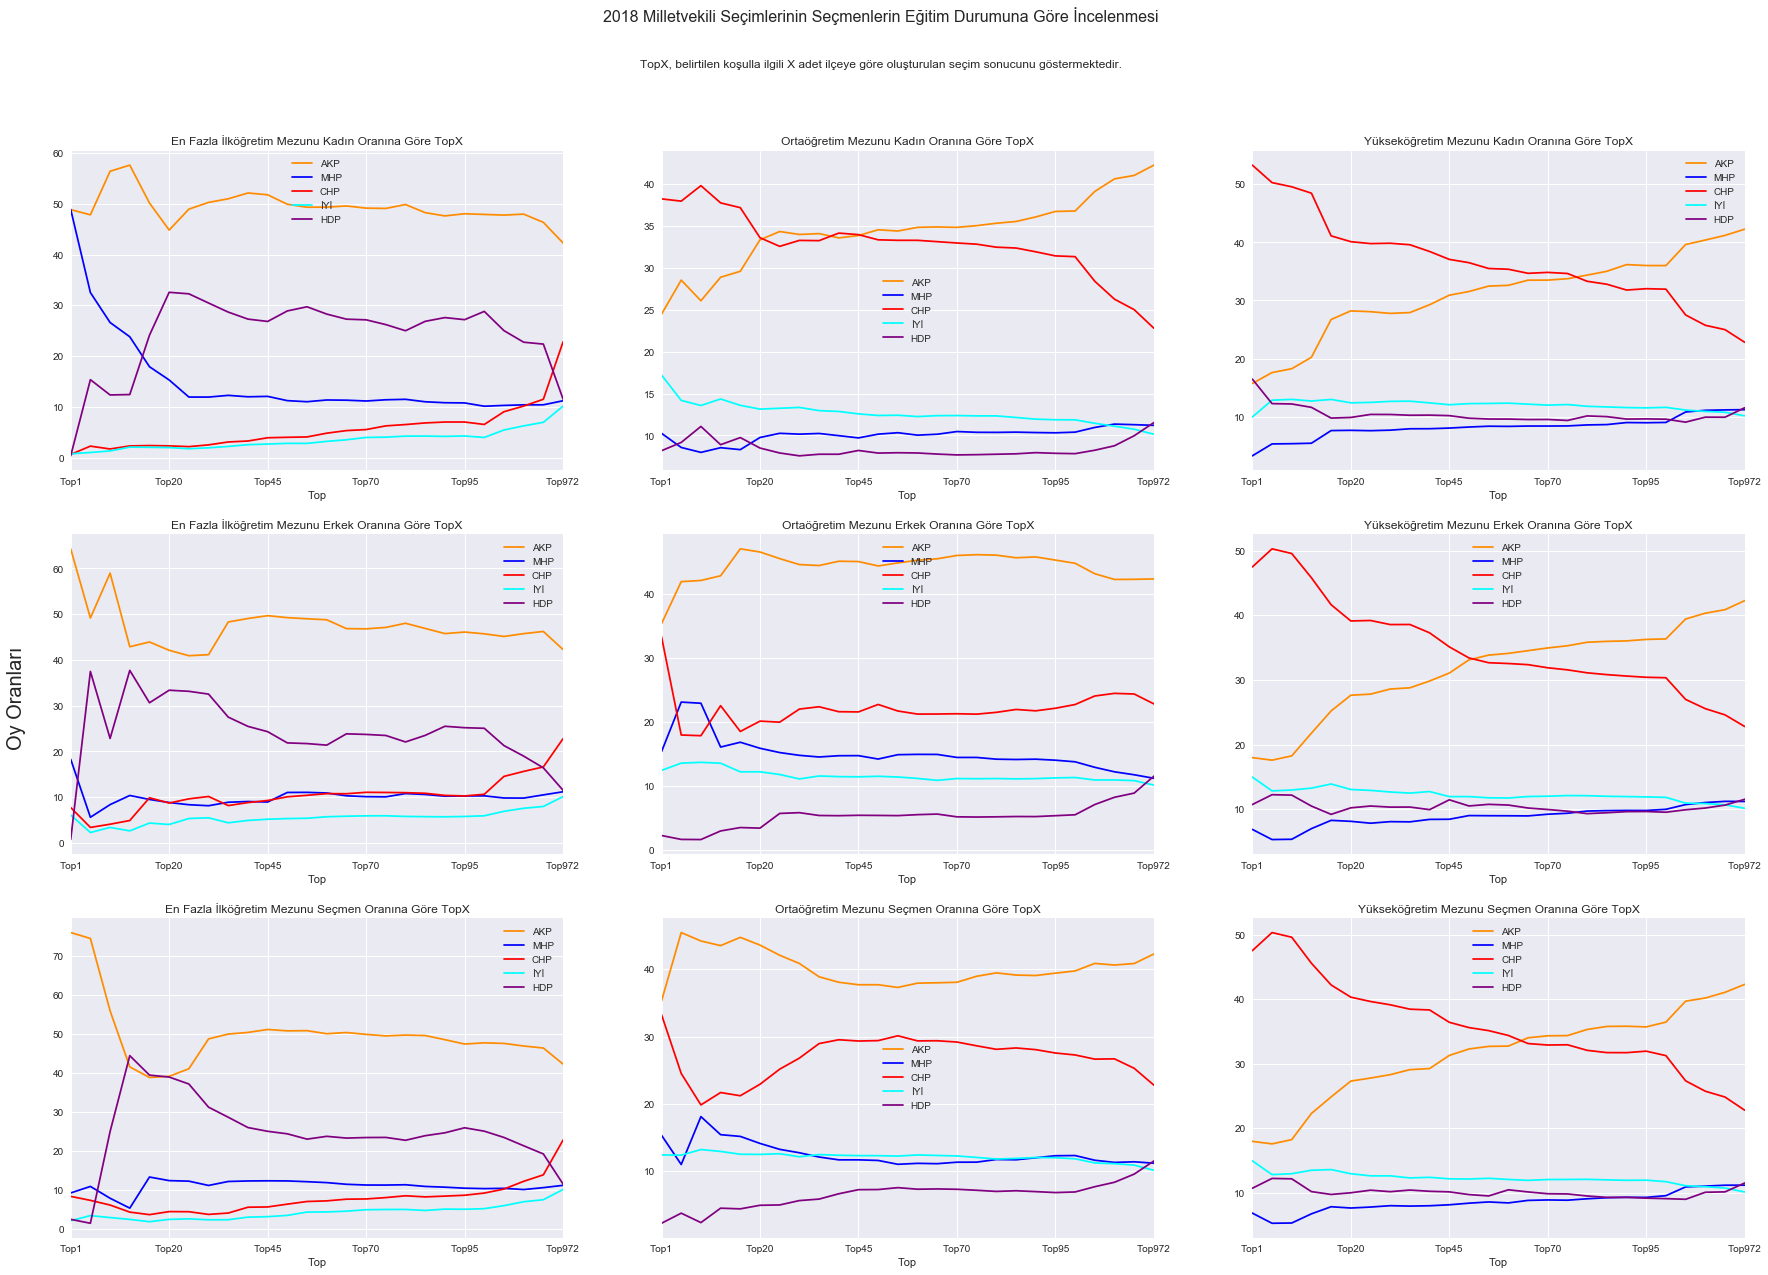

In [35]:
plt.style.use('seaborn')

color=['darkorange', 'blue', 'red', 'cyan', 'purple']

fig, axes = plt.subplots(3, 3, figsize=(30,20))

top_x('Klevel1', False).plot(ax=axes[0][0], color=color).set_title('En Fazla İlköğretim Mezunu Kadın Oranına Göre TopX')
top_x('Klevel2', False).plot(ax=axes[0][1], color=color).set_title('Ortaöğretim Mezunu Kadın Oranına Göre TopX')
top_x('Klevel3', False).plot(ax=axes[0][2], color=color).set_title('Yükseköğretim Mezunu Kadın Oranına Göre TopX')

top_x('Elevel1', False).plot(ax=axes[1][0], color=color).set_title('En Fazla İlköğretim Mezunu Erkek Oranına Göre TopX')
top_x('Elevel2', False).plot(ax=axes[1][1], color=color).set_title('Ortaöğretim Mezunu Erkek Oranına Göre TopX')
top_x('Elevel3', False).plot(ax=axes[1][2], color=color).set_title('Yükseköğretim Mezunu Erkek Oranına Göre TopX')

top_x('Tlevel1', False).plot(ax=axes[2][0], color=color).set_title('En Fazla İlköğretim Mezunu Seçmen Oranına Göre TopX')
top_x('Tlevel2', False).plot(ax=axes[2][1], color=color).set_title('Ortaöğretim Mezunu Seçmen Oranına Göre TopX')
top_x('Tlevel3', False).plot(ax=axes[2][2], color=color).set_title('Yükseköğretim Mezunu Seçmen Oranına Göre TopX')

fig.text(0.1, 0.5, 'Oy Oranları', ha='center', va='center', rotation='vertical', fontsize=20)
fig.suptitle('2018 Milletvekili Seçimlerinin Seçmenlerin Eğitim Durumuna Göre İncelenmesi', fontsize=16)
fig.text(0.5, 0.94,'TopX, belirtilen koşulla ilgili X adet ilçeye göre oluşturulan seçim sonucunu göstermektedir.', 
         fontsize=12, ha='center', va='center')


In [36]:
l=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
    
def comp_edu(duzey):
    tem=pd.DataFrame()
    for i in l:
        m=df[duzey]>i
        te=df[m]
        d1=te.sum(axis=0)
        d1['% Yükseköğretim mezunu']='>'+str(i)
        tem=tem.append(d1, ignore_index=True)

    fin=tem[['% Yükseköğretim mezunu', 'AKP', 'MHP', 'CHP', 'İYİ', 'HDP', 'Geçerli oy sayısı']]
    for p in parti:
        fin[p]=round((fin[p]/fin['Geçerli oy sayısı'])*100, 2)

    fin.set_index('% Yükseköğretim mezunu', inplace=True)
    fin=fin[parti]
    return fin

comp_edu('Klevel3')


,AKP,MHP,CHP,İYİ,HDP
% Yükseköğretim mezunu,,,,,
>5,41.99,11.19,23.38,10.34,11.06
>10,40.79,11.16,25.38,10.82,9.88
>15,38.95,10.28,28.66,11.31,8.88
>20,33.54,8.29,34.16,11.94,10.21
>25,28.37,7.89,39.32,12.48,10.25
>30,27.90,7.68,40.22,12.60,9.82
>35,17.56,4.97,51.27,12.60,12.01
>40,17.91,5.20,50.02,12.71,12.44
>45,17.59,5.30,50.30,12.83,12.24


Text(0.5, 0.94, ">X değerleri, yükseköğretim mezunu oranı %X'ten büyük olan ilçelere göre hesaplanan seçim sonuçlarını göstermektedir.")

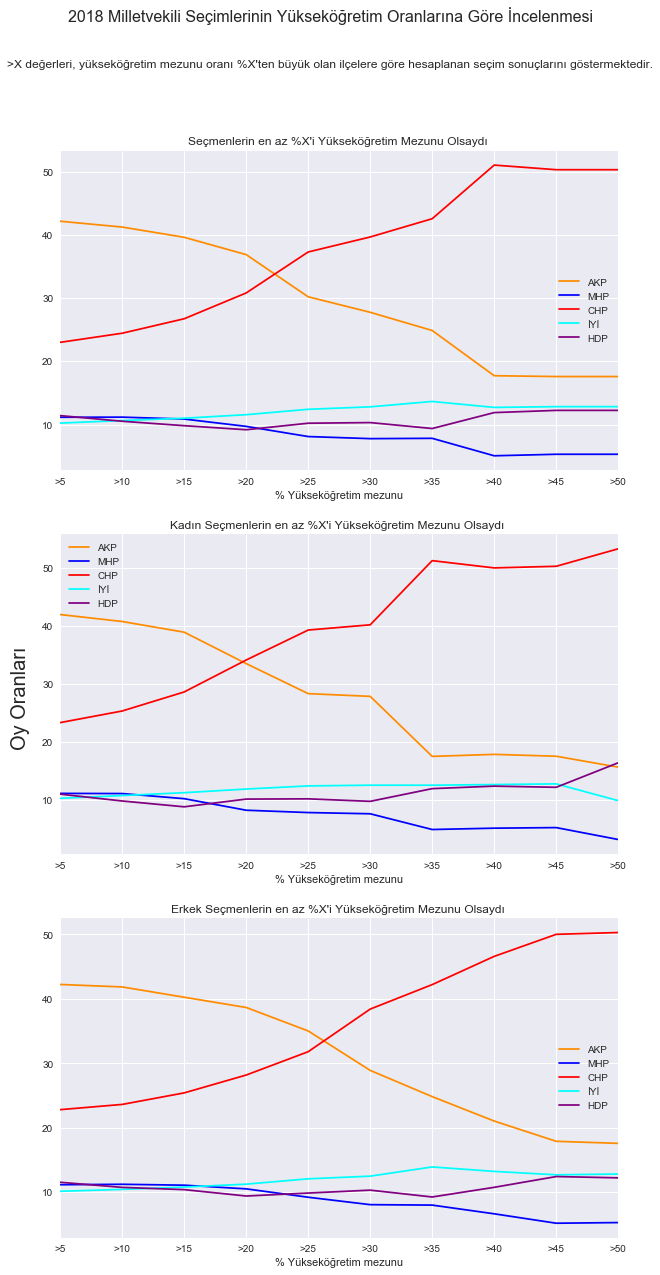

In [37]:
fig, axes = plt.subplots(3, 1, figsize=(10,20))
comp_edu('Tlevel3').plot(ax=axes[0], color=color).set_title("Seçmenlerin en az %X'i Yükseköğretim Mezunu Olsaydı ")
comp_edu('Klevel3').plot(ax=axes[1], color=color).set_title("Kadın Seçmenlerin en az %X'i Yükseköğretim Mezunu Olsaydı ")
comp_edu('Elevel3').plot(ax=axes[2], color=color).set_title("Erkek Seçmenlerin en az %X'i Yükseköğretim Mezunu Olsaydı ")

fig.text(0.07, 0.5, 'Oy Oranları', ha='center', va='center', rotation='vertical', fontsize=20)

fig.suptitle('2018 Milletvekili Seçimlerinin Yükseköğretim Oranlarına Göre İncelenmesi', fontsize=16)
fig.text(0.5, 0.94,">X değerleri, yükseköğretim mezunu oranı %X'ten büyük olan ilçelere göre hesaplanan seçim sonuçlarını göstermektedir.", 
         fontsize=12, ha='center', va='center')
#fig.text(0.5, 0.92,">25, seçmenlerinin en az %25'i yükseköğretim mezunu olan ilçelere göre hesaplanan seçim sonuçlarını göstermektedir.",
#        fontsize=12, ha='center', va='center')

In [38]:
dfeg=pd.read_csv('2018Mv_Egitim.csv')
dfeg.drop('Unnamed: 0', axis=1, inplace=True)

def sth(df, cinsiyet):
    df=df[df['Cinsiyet']==cinsiyet]
    df1=df.groupby('Şehir').sum()
    return df1.reset_index()
sth(dfeg, 'Toplam')

,Şehir,Okuma yazma bilmeyen,Okuma yazma bilen fakat bir okul bitirmeyen,İlkokul,İlköğretim,Ortaokul veya dengi okul,Lise veya dengi okul,Yüksekokul veya fakülte,Yüksek lisans,Doktora,Bilinmeyen,Toplam
0,Adana,68670,83532,343516,224568,144453,395398,233369,19382,3896,8138,1524922
1,Adıyaman,33756,22754,86108,71359,37489,88093,53827,3561,748,1586,399281
2,Afyonkarahisar,16665,24681,164809,85583,45306,102167,58513,5180,1274,2673,506851
3,Aksaray,14272,12180,77422,50972,24444,51428,29401,2680,720,3351,266870
4,Amasya,9243,12836,74278,31558,22937,56469,35311,2382,542,930,246486
...,...,...,...,...,...,...,...,...,...,...,...,...
76,Çorum,22342,28717,117645,58624,33254,77427,46217,3382,777,2304,390689
77,İstanbul,257760,341144,2220426,1576005,975488,2730843,2057015,258721,51087,91197,10559686
78,İzmir,54325,130807,794662,417858,285766,828342,624693,58980,14601,16998,3227032
79,Şanlıurfa,136222,160353,196780,210440,84450,160710,94149,6959,1343,9409,1060815


In [39]:
def calc_edu2(dfeg):
    dfeg['level1']=0
    dfeg['level2']=0
    dfeg['level3']=0
    for i in ['Okuma yazma bilmeyen', 'Okuma yazma bilen fakat bir okul bitirmeyen','İlkokul','İlköğretim']:
        dfeg['level1']+=dfeg.loc[:,i]
    for i in ['Ortaokul veya dengi okul', 'Lise veya dengi okul']:
        dfeg['level2']+=dfeg.loc[:,i]
    for i in ['Yüksekokul veya fakülte','Yüksek lisans','Doktora']:
        dfeg['level3']+=dfeg.loc[:,i]
    dfeg['Total']=dfeg['level1']+dfeg['level2']+dfeg['level3']
    
    dfeg2=dfeg[['Şehir', 'level1', 'level2', 'level3']]
    dfeg2['level1']=round((dfeg2['level1']/dfeg['Total'])*100, 2)
    dfeg2['level2']=round((dfeg2['level2']/dfeg['Total'])*100, 2)
    dfeg2['level3']=round((dfeg2['level3']/dfeg['Total'])*100, 2)
    return dfeg2

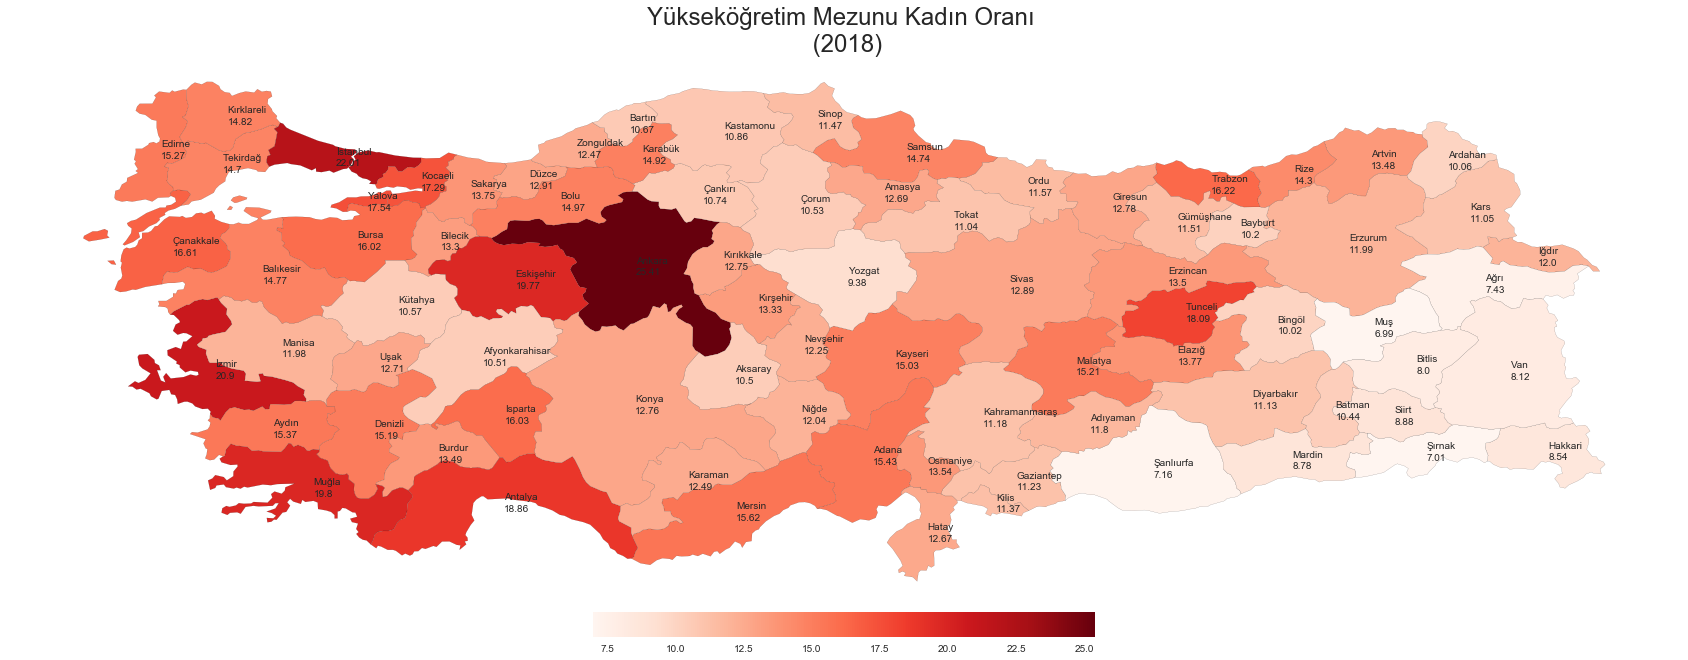

In [40]:
df_k=calc_edu2(sth(dfeg, 'Kadın'))

sh=gpd.read_file('turkiye_iller_shapefile/Il.shp', encoding='utf-8')
plt.style.use('seaborn')
merged = sh.set_index('NAME').join(df_k.set_index('Şehir'))

fig, ax = plt.subplots(1, figsize=(30,20))
vmin, vmax = df_k.level3.min(), df_k.level3.max()

merged.plot(column='level3', cmap='Reds', linewidth=0.1, ax=ax, edgecolor='black')
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar = fig.colorbar(sm, orientation='horizontal', shrink=0.3, pad=0.005)

ax.set_title('Yükseköğretim Mezunu Kadın Oranı \n (2018)', fontsize=24)
ax.axis('off')


for x, y, label in zip(merged.geometry.centroid.x, merged.geometry.centroid.y, merged.index):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")
for x, y, label in zip(merged.geometry.centroid.x, merged.geometry.centroid.y, merged.level3):
    ax.annotate(label, xy=(x, y-0.15), xytext=(3, 3), textcoords="offset points")

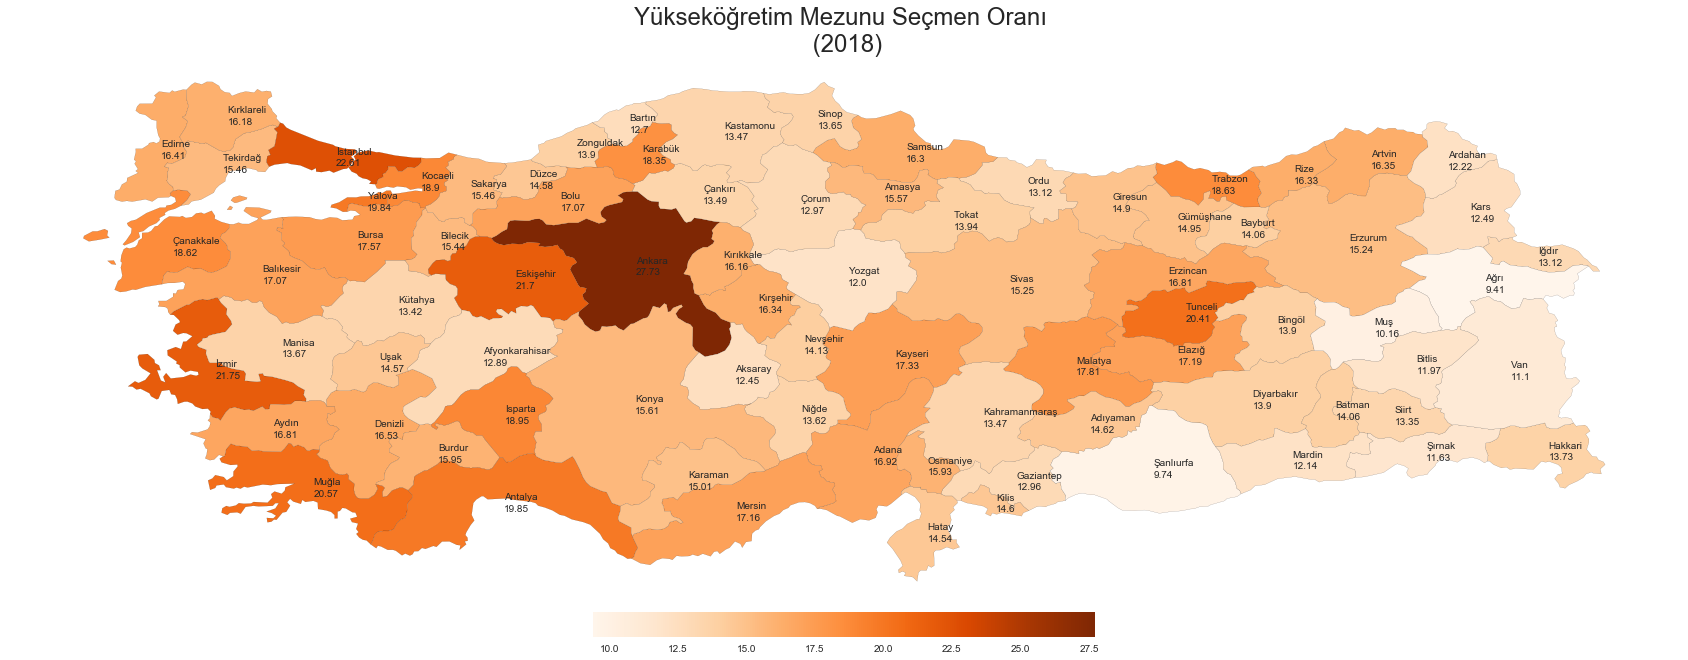

In [41]:
df_t=calc_edu2(sth(dfeg, 'Toplam'))

sh=gpd.read_file('turkiye_iller_shapefile/Il.shp', encoding='utf-8')
plt.style.use('seaborn')
merged1 = sh.set_index('NAME').join(df_t.set_index('Şehir'))

fig, ax = plt.subplots(1, figsize=(30,20))
vmin, vmax = df_t.level3.min(), df_t.level3.max()

merged1.plot(column='level3', cmap='Oranges', linewidth=0.1, ax=ax, edgecolor='black')
sm = plt.cm.ScalarMappable(cmap='Oranges', norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar = fig.colorbar(sm, orientation='horizontal', shrink=0.3, pad=0.005)

ax.set_title('Yükseköğretim Mezunu Seçmen Oranı \n (2018)', fontsize=24)
ax.axis('off')


for x, y, label in zip(merged1.geometry.centroid.x, merged1.geometry.centroid.y, merged1.index):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")
for x, y, label in zip(merged1.geometry.centroid.x, merged1.geometry.centroid.y, merged1.level3):
    ax.annotate(label, xy=(x, y-0.15), xytext=(3, 3), textcoords="offset points")

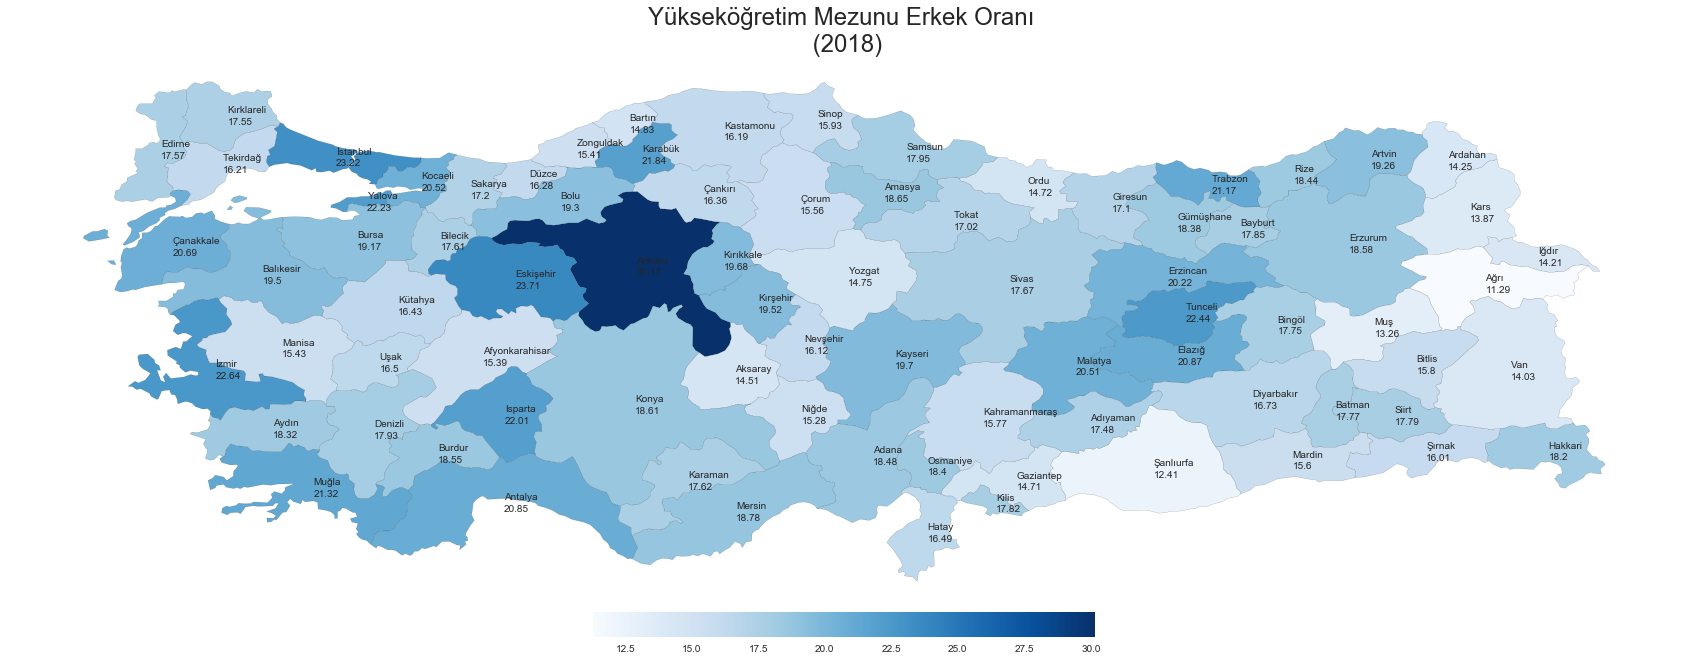

In [42]:
df_e=calc_edu2(sth(dfeg, 'Erkek'))

merged2 = sh.set_index('NAME').join(df_e.set_index('Şehir'))

fig, ax = plt.subplots(1, figsize=(30,20))
vmin, vmax = df_e.level3.min(), df_e.level3.max()

merged2.plot(column='level3', cmap='Blues', linewidth=0.1, ax=ax, edgecolor='black')
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar = fig.colorbar(sm, orientation='horizontal', shrink=0.3, pad=0.005)

ax.set_title('Yükseköğretim Mezunu Erkek Oranı \n (2018)', fontsize=24)
ax.axis('off')


for x, y, label in zip(merged2.geometry.centroid.x, merged2.geometry.centroid.y, merged2.index):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")
for x, y, label in zip(merged2.geometry.centroid.x, merged2.geometry.centroid.y, merged2.level3):
    ax.annotate(label, xy=(x, y-0.15), xytext=(3, 3), textcoords="offset points")

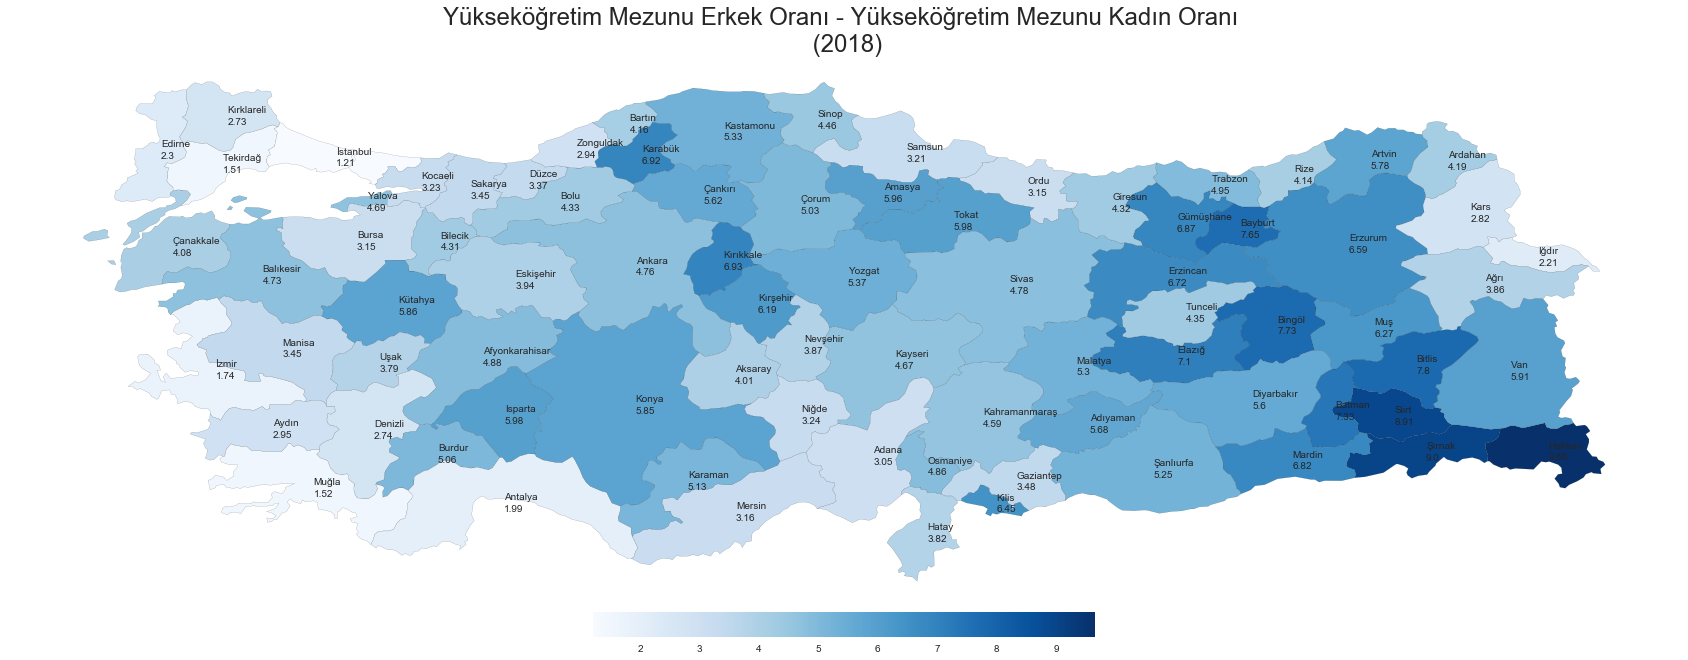

In [43]:
e_k=df_e.set_index('Şehir').subtract(df_k.set_index('Şehir'))
e_k['level3']=e_k['level3'].apply(lambda x: round(x, 2))
mergedf = sh.set_index('NAME').join(e_k)

fig, ax = plt.subplots(1, figsize=(30,20))
vmin, vmax = e_k.level3.min(), e_k.level3.max()

mergedf.plot(column='level3', cmap='Blues', linewidth=0.1, ax=ax, edgecolor='black')
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar = fig.colorbar(sm, orientation='horizontal', shrink=0.3, pad=0.005)

ax.set_title('Yükseköğretim Mezunu Erkek Oranı - Yükseköğretim Mezunu Kadın Oranı \n (2018)', fontsize=24)
ax.axis('off')


for x, y, label in zip(mergedf.geometry.centroid.x, mergedf.geometry.centroid.y, mergedf.index):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")
for x, y, label in zip(mergedf.geometry.centroid.x, mergedf.geometry.centroid.y, mergedf.level3):
    ax.annotate(label, xy=(x, y-0.15), xytext=(3, 3), textcoords="offset points")

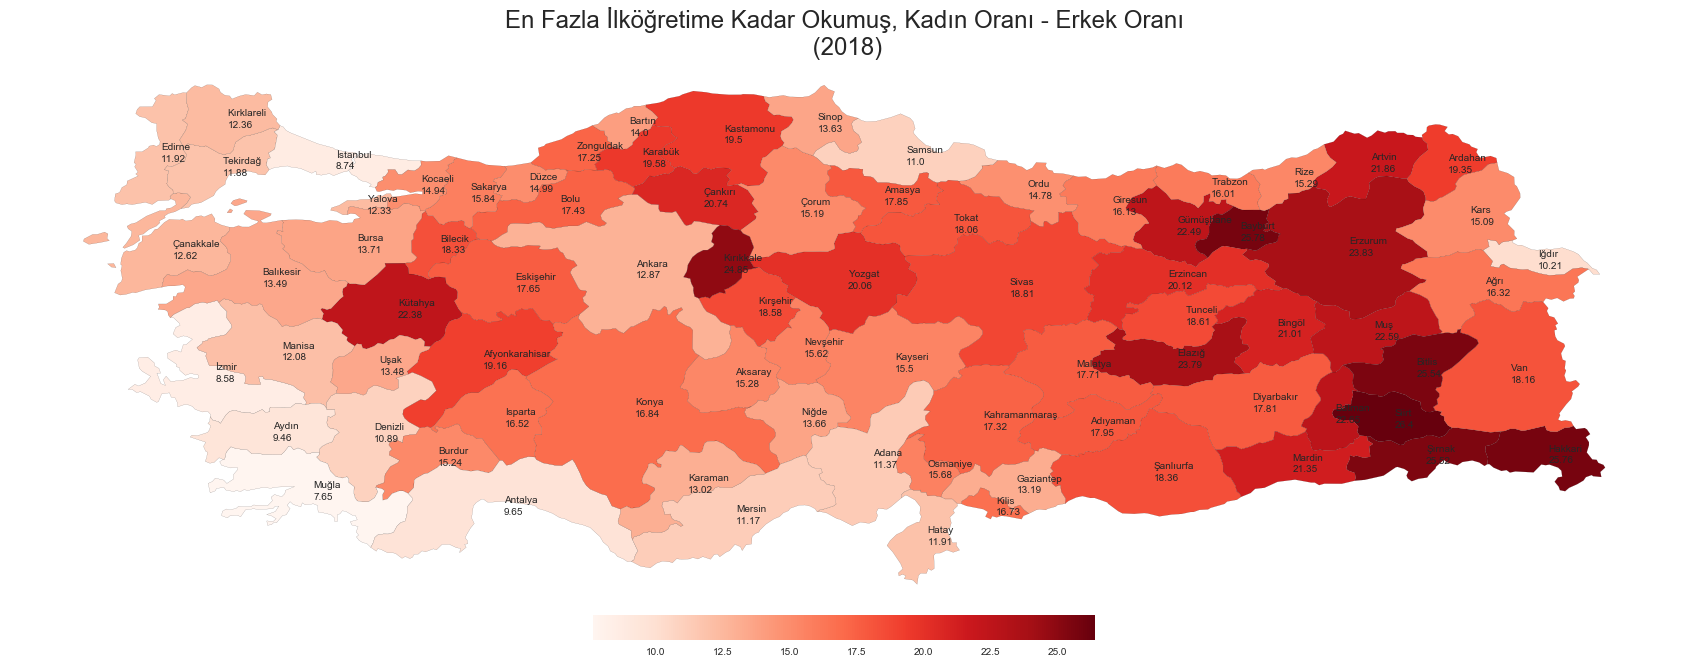

In [44]:
e_k=df_k.set_index('Şehir').subtract(df_e.set_index('Şehir'))
e_k['level1']=e_k['level1'].apply(lambda x: round(x, 2))
mergedf = sh.set_index('NAME').join(e_k)

fig, ax = plt.subplots(1, figsize=(30,20))
vmin, vmax = e_k.level1.min(), e_k.level1.max()

mergedf.plot(column='level1', cmap='Reds', linewidth=0.1, ax=ax, edgecolor='black')
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar = fig.colorbar(sm, orientation='horizontal', shrink=0.3, pad=0.005)

ax.set_title('En Fazla İlköğretime Kadar Okumuş, Kadın Oranı - Erkek Oranı\n (2018)', fontsize=24)
ax.axis('off')


for x, y, label in zip(mergedf.geometry.centroid.x, mergedf.geometry.centroid.y, mergedf.index):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")
for x, y, label in zip(mergedf.geometry.centroid.x, mergedf.geometry.centroid.y, mergedf.level1):
    ax.annotate(label, xy=(x, y-0.15), xytext=(3, 3), textcoords="offset points")